In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt



# load
# make sure id_test is string, and does not get converted to integer
tests = pd.read_csv('blood_tests.csv', dtype={'id_test': 'object'})
ref_scale = pd.read_csv('reference_scale.csv')
comps_map = pd.read_csv('components_map.csv')
meta_map = pd.read_csv('metadata_map.csv')

# replace column names with 


# make sure columns have right datatypes
tests['date_test'] = pd.to_datetime(tests.date_test)



# deal with duplicates

# deal with missing values

# split columns
# if it doesn't already have this column, create it

blood_types = []
rh_factors = []
def fn(row):
    blood_type = row.blood_type
    # get all characters but the last
    btype = blood_type[:-1]
    # get last character
    sign = 0 if blood_type[-1] == '-' else 1
    blood_types.append(btype)
    rh_factors.append(sign)
  
# iterate over each row
tests.apply(fn, axis=1)
tests['blood_type'] = blood_types
tests['rh_factor'] = rh_factors
tests['rh_factor'] = tests['rh_factor'].astype('int')


# turn sex column to 0 and 1
tests['sex'] = tests.sex.apply(lambda s: 0 if s == 'Female' else 1)
tests['sex'] = tests['sex'].astype('int')


print(tests.dtypes)
tests

blood_type                                                object
kell_antigen                                              object
rh_pheno                                                  object
sex                                                        int32
id_test                                                   object
date_test                                         datetime64[ns]
num_test                                                   int64
WBC                                                      float64
BC                                                       float64
HGB                                                      float64
HCT                                                      float64
MCV                                                      float64
MCH                                                      float64
MCHC                                                     float64
PLT                                                      float64
NEUT                     

,blood_type,kell_antigen,rh_pheno,sex,id_test,date_test,num_test,WBC,BC,HGB,...,ser_iron,anti_HCV,HCVNAT,HIV_NAT,HBV_NAT,screening virology (HBsAg- HCV- HIV- syphilis),HIV_COMBO,syphilis antibodies,HBsAg,rh_factor
0,A,KK,CcDEe,1,004425,2017-04-30 16:05:00,1,7.04,4.98,15.07,...,71.0000,negative,negative,negative,negative,negative,negative,negative,negative,1
1,A,KK,CcDEe,1,010165,2017-08-13 16:55:00,2,5.13,4.98,15.47,...,81.0000,negative,negative,negative,negative,negative,negative,negative,negative,1
2,A,KK,CcDEe,1,016348,2017-12-09 15:23:00,3,6.32,5.08,15.43,...,158.0000,negative,negative,negative,negative,negative,negative,negative,negative,1
3,A,KK,CcDEe,1,010085,2018-07-08 15:32:00,4,6.07,4.81,15.06,...,48.0000,negative,negative,negative,negative,negative,negative,negative,negative,1
4,A,KK,CcDEe,1,014781,2018-10-21 17:10:00,5,6.04,5.04,14.90,...,68.0000,negative,negative,negative,negative,negative,negative,negative,negative,1
5,A,KK,CcDEe,1,009771,2019-07-07 14:04:00,7,6.67,5.21,14.98,...,65.0000,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,1
6,A,KK,CcDEe,1,014422,2019-10-13 18:59:00,8,6.20,5.31,15.55,...,68.0000,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,1
7,A,KK,CcDEe,1,006753,2021-05-02 14:33:00,9,5.76,5.16,15.40,...,54.0000,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,1
8,A,KK,CcDEe,1,007767,2022-05-22 07:53:00,10,6.44,5.36,15.98,...,160.0000,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,1
9,A,KK,CcDEe,1,008072,2023-05-28 10:51:15,11,5.31,5.09,15.29,...,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,not in test,1


In [2]:
# before comparing, make sure any leading/trailing whitespace is removed
def stripspace(row):
    row['short'] = row['short'].strip()
    row['long']  = row['long'].strip()
    row['type']  = row['type'].strip()
def stripspace2(row):
    row['comp'] = row['comp'].strip()
    row['measure']  = row['measure'].strip()
    
meta_map.apply(stripspace, axis=1)
comps_map.apply(stripspace, axis=1)
ref_scale.apply(stripspace2, axis=1)




# "Blood Type" matches with:
# blood_type
# Blood_type
# BLOOD TYPE 
#   BLOODTYPE
# -bloodtype
# typeblood
# orig_str is the default you operate with 
# user_str is the one the user has provided 
def is_same_column(orig_str, user_str):
  # lower all strings
  # what remains of both strings?
  orig_str_clean = orig_str.lower().replace(' ', '').replace('_', '')
  user_str_clean = user_str.lower().replace(' ', '').replace('_', '')
  if orig_str_clean != user_str_clean:
    return False
  return True

# is_same_column('Blood Type', 'bloodtype')
 

# dictionary of lists    
metadata_dict = {}
components_dict = {}    
    

# return only numeric Components. This is super cool because you can do analysis on numerical variables 
    
    

# dictionary that maps current column name in Tests, with short column name
short_columns = {} 

# for each row, is it Metadata, Components, Metadata blood etc.
# add column inner_type to tests dataframe

# for each column name in tests, is there any match with my already defined and allowed column names?
# short and long refers to the component name: short "HGB" long "Hemoglobin": short "WBC" long "White Blood Count" etc.
for col in tests.columns:
    is_match = False
    
    # first iterate in Metadata
    for i, row in meta_map.iterrows():
        short = row.short
        long = row.long
        # is there any match between the short or long version name of the column in tests
        is_same = is_same_column(short, col) or is_same_column(long, col)
        if is_same:
            #print('Match found Tests & Metadata')
            #print(short, long, col)
            #print('\n')
            is_match = True
            short_columns[col] = short
            # check if theres already key, else create a new list with that short component in it
            if row.type in metadata_dict:
                metadata_dict[row.type].append(short)
            else:
                metadata_dict[row.type] = [short]
            
        
    # if no match with Metadata, iterate in Components 
    if is_match == False:
        for i, row in comps_map.iterrows():
            short = row.short
            long = row.long
            # is there any match between the short or long version name of the column in tests
            is_same = is_same_column(short, col) or is_same_column(long, col)
            if is_same:
                # print('Match found Tests & Components')
                # print(short, long, col)
                is_match = True
                short_columns[col] = short 
                
                # if the component type is numeric, you need to check if it's in the Reference scale
                if row.type == 'numeric':
                    # now is this component actually in the reference scale?
                    # if yes, does it have min and max? (didnt implement this yet)
                    comp_found = False
                    for _, row_ref in ref_scale.iterrows():
                        # if theres a corresponding component in Reference scale
                        if row_ref.comp == short:
                            # print('This column name IS in the Reference scale')
                            # print(short)
                            comp_found = True
                            # add numeric component only if it's also in the Reference scale
                            if 'numeric' in components_dict:
                                components_dict['numeric'].append(short)
                            else:
                                components_dict['numeric'] = [short]
                            break

                    if comp_found == False:
                        #print('This column name is NOT in the Reference scale, or it\'s missing values')
                        # print(short)
                        pass
                
                # component is not numeric 
                else:
                    if 'no_numeric' in components_dict:
                        components_dict['no_numeric'].append(short)
                    else:
                        components_dict['no_numeric'] = [short]

                    
              


    # it means the column name in Tests has not been found neither in Metadata nor in Components, it means
    if is_match == False: 
        #print('This column hasn\'t been found in Metadata or Components')
        #print(col)
        pass
    
    #print('\n')


    
    
# delete extraneous columns?


# what to do with duplicates?
    
    
    
# now change the colummn names so that they are ALL short column names
tests = tests.rename(columns=short_columns)



# deal with missing data on numeric Components
# I choose to replace missing data with the median of the column
def replace_missing():
    cols = components_dict['numeric']
    for col in cols:
        # where you find 'not in test' replaces that value with the median of the column except where it is missing values
        # first you need to convert it to float for it to calculate median
        col_without_missing = (tests[col][tests[col] != 'not in test']).astype('float')
        median = np.median(col_without_missing)
        tests[col].replace('not in test', median, inplace=True)   
        tests[col] = tests[col].astype('float')
        
    
    
replace_missing()


# returns a DataFrame with columns from Tests
def get_meta(meta_type):
    cols = metadata_dict[meta_type] 
    return tests.loc[:, cols]


def get_numeric_comps():
    cols = components_dict['numeric']
    return tests.loc[:, cols]
    
    
def get_nonumeric_comps():
    cols = components_dict['no_numeric']
    return tests.loc[:, cols]
    
    
# get the data you want, this makes analysis so much easier and scalable
# get_meta('test')
# get_meta('person')
# get_meta('blood') 
get_numeric_comps()
# get_nonumeric_comps()

,WBC,BC,HGB,HCT,MCV,MCH,MCHC,PLT,NEUT,LYMPH,EOS,chol,ALT,AST,creat,trigl,prot_tot,ser_iron
0,7.04,4.98,15.07,44.3,89.01,30.28,34.01,192.0,35.83,51.12,5.121,153.0,25.0,20.0,0.9,52.0,7.32,71.0
1,5.13,4.98,15.47,46.0,92.43,31.06,33.61,141.0,51.78,35.84,4.395,136.0,32.0,56.0,1.0,38.0,6.91,81.0
2,6.32,5.08,15.43,44.5,87.70,30.39,34.66,173.0,48.85,38.28,5.420,141.0,28.0,23.0,1.1,52.0,7.42,158.0
3,6.07,4.81,15.06,44.9,93.30,31.29,33.54,178.0,46.88,37.17,5.225,129.0,20.0,19.0,1.0,74.0,7.10,48.0
4,6.04,5.04,14.90,43.6,86.52,29.54,34.14,157.0,40.38,43.78,5.113,154.0,43.0,23.0,1.0,81.0,6.96,68.0
5,6.67,5.21,14.98,45.8,87.83,28.75,32.73,159.0,50.73,33.87,5.109,169.0,31.0,19.0,1.0,93.0,7.04,65.0
6,6.20,5.31,15.55,46.9,88.32,29.27,33.14,176.0,47.16,38.36,4.595,171.0,28.0,15.0,1.1,117.0,7.06,68.0
7,5.76,5.16,15.40,46.4,90.08,29.86,33.15,208.0,51.57,34.29,5.377,156.0,24.0,17.0,0.9,48.0,7.26,54.0
8,6.44,5.36,15.98,47.7,88.98,29.82,33.51,190.0,48.61,36.36,5.868,198.0,13.0,12.0,1.0,80.0,6.77,160.0
9,5.31,5.09,15.29,45.7,89.71,30.02,33.46,152.0,42.93,39.37,7.664,175.0,20.0,21.0,0.8,32.0,6.50,68.0


In [3]:
# done with cleaning and formatting, now the (even more) FUN begins! Loyal algorithms, on my command!!

# given a range given as a tuple, default scales to (0,1) unless specified otherwise 
def get_scaled(x, x_range, y_range=(0,1), round_to=5):
    x_min, x_max = x_range
    y_min, y_max = y_range
    x_coeff = (x_max - x_min) / (y_max - y_min)
    y_diff = (x - x_min) / x_coeff 
    y = y_min + y_diff
    return round(y, round_to)




# only scales numeric Components
def get_scaled_comps(numeric_comps):    
    # construct a new dataframe with scaled values from numeric Components
    numeric_comps_scaled = pd.DataFrame({})
    # for each column of numeric Components, find the min and max range in Reference scale
    for comp in components_dict['numeric']:
        row = ref_scale[ref_scale['comp'] == comp]
        x_min = row['min'].values[0]
        x_max = row['max'].values[0]        
        # apply a function for each column
        scaled_comp = numeric_comps[comp].apply(lambda x: get_scaled(x, x_range=(x_min, x_max)))
        numeric_comps_scaled[comp] = scaled_comp
    return numeric_comps_scaled

     
    

numeric_comps_scaled = get_scaled_comps(get_numeric_comps())
numeric_comps_scaled

,WBC,BC,HGB,HCT,MCV,MCH,MCHC,PLT,NEUT,LYMPH,EOS,chol,ALT,AST,creat,trigl,prot_tot,ser_iron
0,0.53016,0.47423,0.68222,0.56154,0.50056,0.82308,0.602,0.168,-0.13900,1.5560,0.73157,0.64017,0.50,0.07143,0.40678,0.260,0.510,0.28099
1,0.22698,0.47423,0.77111,0.69231,0.69056,0.97308,0.522,-0.036,0.39267,0.7920,0.62786,0.56904,0.64,0.92857,0.57627,0.190,0.305,0.36364
2,0.41587,0.52577,0.76222,0.57692,0.42778,0.84423,0.732,0.092,0.29500,0.9140,0.77429,0.58996,0.56,0.14286,0.74576,0.260,0.560,1.00000
3,0.37619,0.38660,0.68000,0.60769,0.73889,1.01731,0.508,0.112,0.22933,0.8585,0.74643,0.53975,0.40,0.04762,0.57627,0.370,0.400,0.09091
4,0.37143,0.50515,0.64444,0.50769,0.36222,0.68077,0.628,0.028,0.01267,1.1890,0.73043,0.64435,0.86,0.14286,0.57627,0.405,0.330,0.25620
5,0.47143,0.59278,0.66222,0.67692,0.43500,0.52885,0.346,0.036,0.35767,0.6935,0.72986,0.70711,0.62,0.04762,0.57627,0.465,0.370,0.23140
6,0.39683,0.64433,0.78889,0.76154,0.46222,0.62885,0.428,0.104,0.23867,0.9180,0.65643,0.71548,0.56,-0.04762,0.74576,0.585,0.380,0.25620
7,0.32698,0.56701,0.75556,0.72308,0.56000,0.74231,0.430,0.232,0.38567,0.7145,0.76814,0.65272,0.48,0.00000,0.40678,0.240,0.480,0.14050
8,0.43492,0.67010,0.88444,0.82308,0.49889,0.73462,0.502,0.160,0.28700,0.8180,0.83829,0.82845,0.26,-0.11905,0.57627,0.400,0.235,1.01653
9,0.25556,0.53093,0.73111,0.66923,0.53944,0.77308,0.492,0.008,0.09767,0.9685,1.09486,0.73222,0.40,0.09524,0.23729,0.160,0.100,0.25620


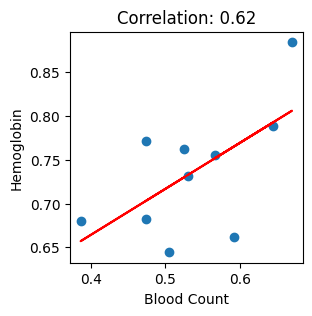

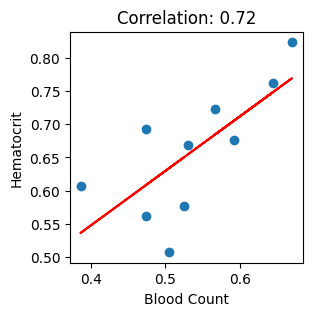

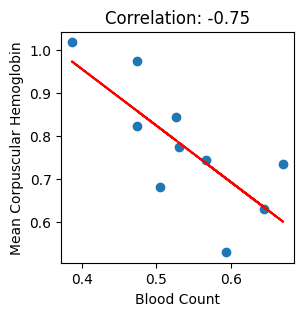

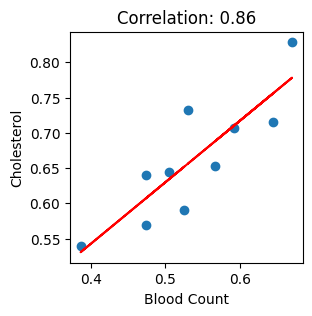

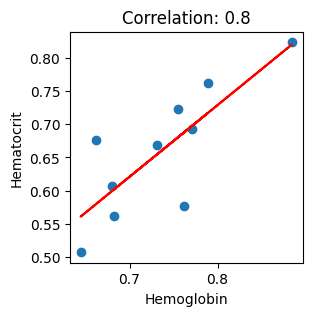

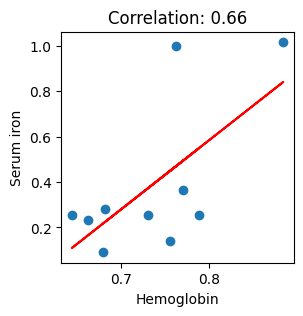

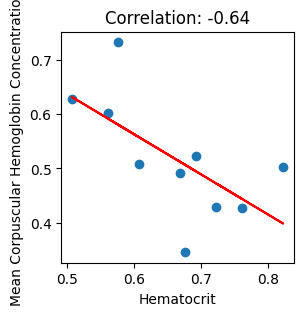

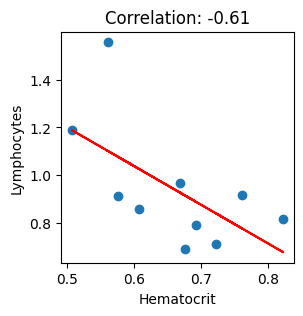

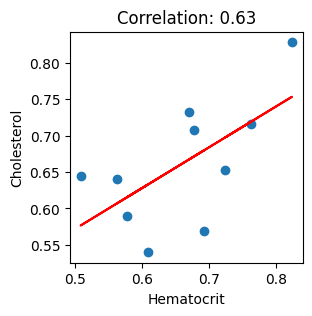

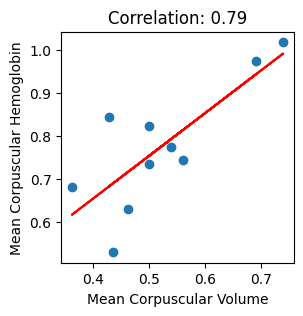

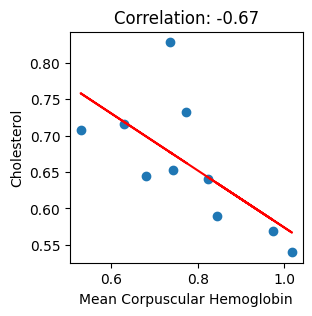

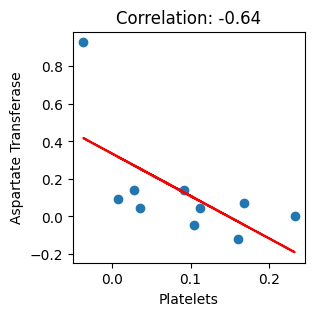

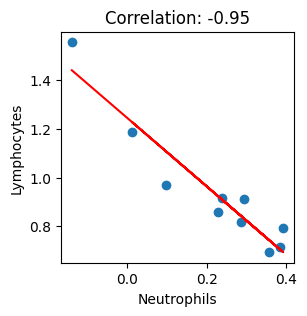

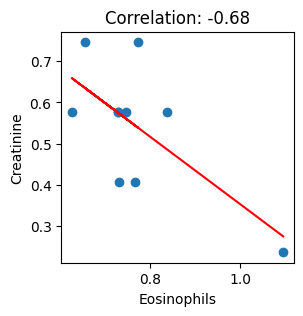

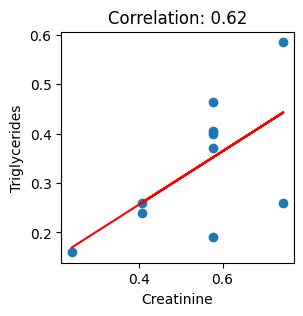

In [4]:
patterns_relevant = {}

# find patterns between different scaled numeric Components
def find_pattern(pattern_type):
    comps = components_dict['numeric']
    if pattern_type == 'correlation':
        relevant_pairs = []
        # combination  
        for i1, comp1 in enumerate(comps):
            for _, comp2 in enumerate(comps[i1+1:]):
                # get the actual Series from the numeric Components
                col1 = numeric_comps_scaled[comp1]
                col2 = numeric_comps_scaled[comp2]
                # compute pattern
                stat, pval = pearsonr(col1, col2)
                # assess pattern significance
                if abs(stat) > 0.6:
                    relevant_pairs.append({'comp1': comp1, 'comp2': comp2, 'col1': col1, 'col2': col2, 'corr':stat}) 
        # return a list of lists with all relevant pairs
        return relevant_pairs
            
        
        
    
    
def get_long_comp(short_comp):
    long_comp = comps_map[comps_map['short'] == short_comp]['long'].values[0]
    return long_comp

    

        
def mass_scatter(lst_pairs):
#     n_cols = 3
#     n_rows = int(len(lst_pairs) / n_cols)+1
#     print(n_rows, len(lst_pairs))
#     count_col = 1
#     count_row = 1

#     fig, ax = plt.subplots(n_rows, n_cols)

    for pair_dict in lst_pairs:
        # if the count of column has reached the columns I want, reset to 1 and increase count of row by 1
#         if count_col-1 == n_cols-1:
#             count_col = 0
#             count_row += 1
        comp1 = pair_dict['comp1']
        comp2 = pair_dict['comp2']
        col1 = pair_dict['col1']
        col2 = pair_dict['col2']
        corr = round(pair_dict['corr'], 2)
        plt.figure(figsize=(3,3))
        plt.scatter(col1, col2)
        plt.xlabel(get_long_comp(comp1))
        plt.ylabel(get_long_comp(comp2))
        # regression line
        m, b = np.polyfit(col1, col2, 1)
        plt.plot(col1, m*col1+b, color='red')
#         plt.xlim(-1.5,1.5)
#         plt.ylim(-1.5,1.5)
        plt.title(f'Correlation: {corr}')
        
#         ax[count_row-1, count_col-1].scatter(col1, col2)
#         count_col += 1

    plt.show()
        
        
    #plt.clf()
        

            
            
pairs = find_pattern('correlation')
mass_scatter(pairs)